In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# maindir = '/content/drive/MyDrive/FinTech-final-project'
maindir = '/content/drive/MyDrive/FinTech-final-project'
datadir = f'{maindir}/data'
spmdir = f'{maindir}/spm'
modeldir = f'{maindir}/models'
cat_df_path = f'{maindir}/東吳課程_發票資料集/品類資料集/cat_train_v2.csv'

In [2]:
datapath = f'{datadir}/category/category_labels_v2.pkl'

import joblib
data = joblib.load(datapath)

In [25]:
import json
maind = '/Users/yangqingwen/Desktop/Github/2022Fintech-project'
p = f'{maind}/data/category/category_dictionary.json'

with open (p, 'r') as f:
    catd = json.load(f)

In [11]:
small = []
for k, v in catd.items():
    if len(v) <= 50:
        small.append((k,v))


41

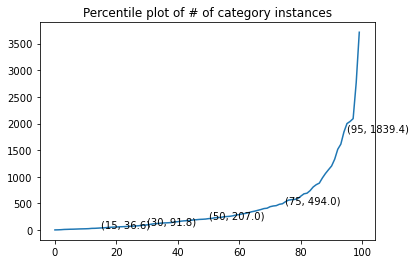

In [30]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import scoreatpercentile

a=list(range(1,101))
instances_count = [len(v) for k, v in catd.items()]
b = [scoreatpercentile(instances_count,i) for i in a]
plt.title('Percentile plot of # of category instances')
plt.plot(b)
percs = [15, 30, 50, 75, 95]
for perc in percs:
    y = np.percentile(instances_count, perc)
    plt.annotate(f'({perc}, {round(y,2)})', (perc, y+3))
plt.savefig('category_percentile.png') 

In [28]:
import joblib

maind = '/Users/yangqingwen/Desktop/Github/2022Fintech-project'
datapath = f'{maind}/data/category/category_labels_v2.pkl'
data = joblib.load(datapath)
from collections import defaultdict
multis = defaultdict(int)
for x in data:
    multis[len(x['categories'])] += 1
    if len(x['categories']) >= 2:
        print(x['name'], x['categories'])
multis 

原萃烏龍茶1250ml ['即飲烏龍茶', '即飲無糖茶']
冷萃金萱烏龍茶 ['即飲烏龍茶', '即飲無糖茶']
原萃冷萃 金萱烏龍茶 ['即飲烏龍茶', '即飲無糖茶']
原萃冷萃烏龍茶 ['即飲烏龍茶', '即飲無糖茶']
原萃烏龍茶 ['即飲烏龍茶', '即飲無糖茶']
網-原萃烏龍茶 ['即飲烏龍茶', '即飲無糖茶']
原萃包種烏龍茶 ['即飲烏龍茶', '即飲無糖茶']
原萃雲間烏龍茶580ml ['即飲烏龍茶', '即飲無糖茶']
*原萃烏龍茶PET580 ['即飲烏龍茶', '即飲無糖茶']
原萃烏龍茶含包種茶 ['即飲烏龍茶', '即飲無糖茶']
原萃雲間烏龍茶 580ml*24入 ['即飲烏龍茶', '即飲無糖茶']
【0272114283】原萃烏龍茶580ml ['即飲烏龍茶', '即飲無糖茶']
545316@原萃雲間烏龍茶580ML*4 ['即飲烏龍茶', '即飲無糖茶']
每朝雙纖烏龍茶-900 ['即飲烏龍茶', '即飲無糖茶']
^原萃冷萃金萱烏龍茶450ML ['即飲烏龍茶', '即飲無糖茶']
原萃烏龍茶580ml ['即飲烏龍茶', '即飲無糖茶']
原萃冷萃金萱烏龍茶450ml/瓶 ['即飲烏龍茶', '即飲無糖茶']
【原萃】原萃包種烏龍茶 寶特瓶 580ml(4入/組) ['即飲烏龍茶', '即飲無糖茶']
原萃烏龍茶 含文 ['即飲烏龍茶', '即飲無糖茶']
原萃烏龍茶*4入 ['即飲烏龍茶', '即飲無糖茶']
原萃冷萃金萱烏龍茶 ['即飲烏龍茶', '即飲無糖茶']
【午茶夫人】檸檬草玫瑰紅茶15入/盒(自然甘甜 無加糖) ['即飲紅茶', '即飲無糖茶']
VV日式無糖烏龍茶1480ml ['即飲烏龍茶', '即飲無糖茶']
631914@茶王青心烏龍茶無糖600ML ['即飲烏龍茶', '即飲無糖茶']
御茶園每朝健康綠茶 ['即飲綠茶', '即飲無糖茶']
(區)每朝健康綠茶PET650(四入) ['即飲綠茶', '即飲無糖茶']
原萃日式綠茶PET975 ['即飲綠茶', '即飲無糖茶']
冷泡茶冷萃綠茶 ['即飲綠茶', '即飲無糖茶']
每朝健康 綠茶 650ml (24入)/箱【康鄰超市】 ['即飲綠茶', '即飲無糖茶']
原萃綠茶玉露580mlx4【愛買】 ['即飲綠茶', '即飲無糖茶']


defaultdict(int, {1: 91919, 2: 374, 3: 12, 4: 1})

In [29]:
for x in data:
    if len(x['categories']) > 3:
        print(x['name'], x['categories'])

小蘑菇氣墊BB霜 水感修飾妝容 美化均勻膚色 修容BB霜  粉底液 cc霜  保濕遮蓋瑕疵 提亮膚色NailsMall ['修容', 'BB霜', '粉底液', 'CC霜']


## Category count 

In [6]:
from collections import defaultdict
freqD = defaultdict(int)
nameD = defaultdict(list)
for x in data:
    for c in x['categories']:
        nameD[c].append(x['name'])
        freqD[c]+=1
len(freqD) == 217

True

In [7]:
sfreqD = sorted(freqD.items(), key = lambda x:x[1], reverse = True)

In [5]:
sfreqD

[('洗髮精', 3713),
 ('沐浴乳', 3100),
 ('洗面乳', 2846),
 ('速食麵/泡麵', 2360),
 ('洗衣精', 2099),
 ('運動/機能服', 2074),
 ('成人牙膏', 2069),
 ('運動鞋', 2005),
 ('啤酒', 2000),
 ('貓乾糧罐頭', 1999),
 ('面膜', 1873),
 ('護髮乳', 1831),
 ('菸', 1818),
 ('濕紙巾', 1604),
 ('電暖器', 1549),
 ('鍋具', 1531),
 ('狗乾糧罐頭', 1412),
 ('常溫醬包', 1345),
 ('成人牙刷', 1293),
 ('面霜/乳霜', 1218),
 ('護唇膏', 1185),
 ('滑鼠', 1135),
 ('唇膏', 1133),
 ('礦泉水', 1065),
 ('衛生紙', 1061),
 ('碳酸飲料', 1003),
 ('護手霜', 976),
 ('臉部乳液', 890),
 ('化妝水', 882),
 ('指甲油', 872),
 ('眉筆', 854),
 ('醬油類', 847),
 ('智慧型手機', 811),
 ('精華液', 805),
 ('粉底液', 776),
 ('潤髮乳', 712),
 ('眼影盤', 711),
 ('鮮乳', 685),
 ('即溶咖啡', 683),
 ('粉餅', 680),
 ('衛生棉', 662),
 ('麥片穀類', 638),
 ('葉黃素', 626),
 ('RTD調酒', 590),
 ('即飲紅茶', 588),
 ('保險套', 578),
 ('即飲綠茶', 572),
 ('吸塵器', 572),
 ('妝前乳/隔離霜', 571),
 ('除濕機', 566),
 ('快煮麵/乾拌麵', 561),
 ('即飲奶茶', 538),
 ('優格', 532),
 ('氣泡水', 502),
 ('防曬', 494),
 ('蜜粉', 490),
 ('鍵盤', 485),
 ('維他命B', 480),
 ('狗零食', 459),
 ('洗衣球', 459),
 ('成人奶粉', 453),
 ('吹風機', 451),
 ('即飲無糖茶', 441),
 ('身體

In [15]:
# string match ratio 
# 在每一類別中，計算該類別裡的name和category name 有exact string match的比例

def has_exact_match(k, v):
  return sum(1 if k in n else 0 for n in v )
ratioD = {}
for k, v in nameD.items():
  denominator = len(v)
  nominator = has_exact_match(k, v)
  ratioD[k] = (nominator/denominator, nominator, denominator)
sorted(ratioD.items(), key = lambda x:(-x[1][0], x[1][2]))  # value:nominator/denominator and denominator

[('染唇液', (1.0, 2, 2)),
 ('保溫杯', (1.0, 3, 3)),
 ('槓片', (1.0, 4, 4)),
 ('DD霜', (1.0, 13, 13)),
 ('甲油膠', (1.0, 20, 20)),
 ('羊乳', (1.0, 21, 21)),
 ('洗碗機', (1.0, 23, 23)),
 ('唇線筆', (1.0, 23, 23)),
 ('椰奶', (1.0, 30, 30)),
 ('跑步機', (1.0, 35, 35)),
 ('乳酸菌', (1.0, 41, 41)),
 ('葉酸', (1.0, 56, 56)),
 ('唇彩', (1.0, 76, 76)),
 ('果汁機', (1.0, 78, 78)),
 ('氣炸鍋', (1.0, 90, 90)),
 ('唇露', (1.0, 91, 91)),
 ('電磁爐', (1.0, 112, 112)),
 ('烘碗機', (1.0, 116, 116)),
 ('BB霜', (1.0, 120, 120)),
 ('咖啡機', (1.0, 135, 135)),
 ('湯圓', (1.0, 139, 139)),
 ('薑黃', (1.0, 165, 165)),
 ('精油', (1.0, 175, 175)),
 ('掃地機', (1.0, 182, 182)),
 ('電鍋', (1.0, 190, 190)),
 ('眼線筆', (1.0, 192, 192)),
 ('電子鍋', (1.0, 195, 195)),
 ('雞精', (1.0, 201, 201)),
 ('烤箱', (1.0, 207, 207)),
 ('冰箱', (1.0, 216, 216)),
 ('芳香豆', (1.0, 224, 224)),
 ('奶瓶', (1.0, 235, 235)),
 ('微波爐', (1.0, 235, 235)),
 ('眼線液', (1.0, 251, 251)),
 ('睡袋', (1.0, 253, 253)),
 ('棉條', (1.0, 256, 256)),
 ('洗衣機', (1.0, 320, 320)),
 ('腮紅', (1.0, 373, 373)),
 ('吹風機', (1.0, 451, 451)),
 (

(0.2892561983471074, 35, 121)

至少可以確定以下這些類別應該是有解，可以過完validation後用string match去做做看。在linear classifier做完後，挑出「**比較容易出錯的類別**」<-要想一個操作型定義！，然後將每個instance都再過一遍string match找類別～。
```
('染唇液', (1.0, 2, 2)),
 ('保溫杯', (1.0, 3, 3)),
 ('槓片', (1.0, 4, 4)),
 ('DD霜', (1.0, 13, 13)),
 ('甲油膠', (1.0, 20, 20)),
 ('羊乳', (1.0, 21, 21)),
 ('洗碗機', (1.0, 23, 23)),
 ('唇線筆', (1.0, 23, 23)),
```

但下面這些support數量少，又沒有exact string match的可能就很難有解了（ratio都是0 QQ）。可能再仔細一點還可以把slash或括弧給去掉了或甚至用lcs去找，但runtime上真的cp值很低。
```
 ('水路/健行鞋', (0.0, 0, 4)),
 ('嬰幼手推車', (0.0, 0, 6)),
 ('嬰幼乳液', (0.0, 0, 6)),
 ('媽媽茶(哺乳茶)', (0.0, 0, 9)),
 ('原味牛乳', (0.0, 0, 14)),
```



